# Laboratory 5

In [23]:
%display latex

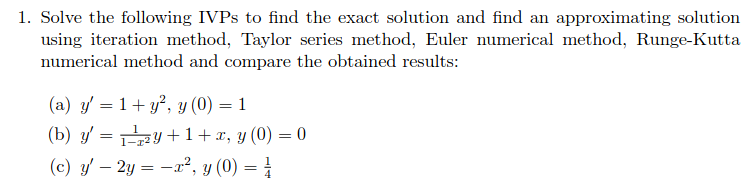

### Iterative method

In [24]:
reset()

In [25]:
x, s = var('x s')
y = function('y')(x)

In [26]:
def picard_iteration_method(n, f, y0):
    x, s = var('x s')
    
    y_ = [None] * n
    y_[0] = y0
    # display(y_[0](x))
    
    for i in range(1, n):
        print(f"{i}/{n-1}")
        y_[i] = lambda x, i=i: (1 + integral(f(s, y_[i - 1](s)), s, 0, x)).subs(x=x)
        # display(y_[i](x))
    return y_

In [27]:
f = lambda x, y: 1 + y^2
y0 = lambda x: 1
n = 6

y_ = picard_iteration_method(n, f, y0)
for i in range(n):
    display(y_[i](x))

1/5
2/5
3/5
4/5
5/5


1

2*x + 1

4/3*x^3 + 2*x^2 + 2*x + 1

16/63*x^7 + 8/9*x^6 + 28/15*x^5 + 8/3*x^4 + 8/3*x^3 + 2*x^2 + 2*x + 1

256/59535*x^15 + 128/3969*x^14 + 704/5265*x^13 + 368/945*x^12 + 15088/17325*x^11 + 7424/4725*x^10 + 2272/945*x^9 + 338/105*x^8 + 1216/315*x^7 + 188/45*x^6 + 4*x^5 + 10/3*x^4 + 8/3*x^3 + 2*x^2 + 2*x + 1

65536/109876902975*x^31 + 32768/3544416225*x^30 + 33636352/445414972275*x^29 + 2189312/5119712325*x^28 + 3771621376/2017062172125*x^27 + 3496164352/522942044625*x^26 + 1852466944/91423434375*x^25 + 28632512/536350815*x^24 + 234841821952/1884677169375*x^23 + 14839805056/56729413125*x^22 + 1241511104/2483105625*x^21 + 400722032/456080625*x^20 + 1157035136/808782975*x^19 + 4159073344/1915538625*x^18 + 1240970116/402026625*x^17 + 175768612/42567525*x^16 + 1111144976/212837625*x^15 + 29636504/4729725*x^14 + 4842328/675675*x^13 + 1221016/155925*x^12 + 425608/51975*x^11 + 1108/135*x^10 + 22376/2835*x^9 + 764/105*x^8 + 32/5*x^7 + 16/3*x^6 + 64/15*x^5 + 10/3*x^4 + 8/3*x^3 + 2*x^2 + 2*x + 1

In [28]:
yy = function('yy')(x)
y_ex = desolve(diff(yy, x) == 1 + yy^2, dvar=yy, ivar=x, ics=[0, 1])
# y_ex = desolve(diff(yy, x) == yy, dvar=yy, ivar=x, ics=[0, 1])
display(y_ex)
def yy_ex(x):
    return y_ex.subs(x=x)

arctan(yy(x)) == 1/4*pi + x

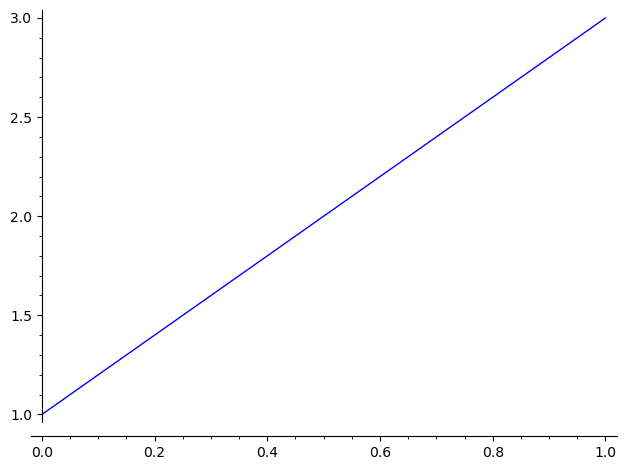

In [29]:
y_[1](x)
plot(lambda x: y_[1](x), 0, 1)

In [30]:
fn = lambda x: y_[1](x)

In [ ]:
f = lambda x, y: y / (1 - x^2) + 1 + x
y0 = lambda x: 0
n = 6

y_ = picard_iteration_method(n, f, y0)
for i in range(n):
    display(y_[i](x))

In [33]:
f = lambda x, y: 2*y - x^2
y0 = lambda x: 1/4
n = 6

y_ = picard_iteration_method(n, f, y0)
for i in range(n):
    display(y_[i](x))

1/5
2/5
3/5
4/5
5/5


1/4

-1/3*x^3 + 1/2*x + 1

-1/6*x^4 - 1/3*x^3 + 1/2*x^2 + 2*x + 1

-1/15*x^5 - 1/6*x^4 + 2*x^2 + 2*x + 1

-1/45*x^6 - 1/15*x^5 + x^3 + 2*x^2 + 2*x + 1

-2/315*x^7 - 1/45*x^6 + 1/2*x^4 + x^3 + 2*x^2 + 2*x + 1

In [34]:
yy = function('yy')(x)
y_ex = desolve(diff(yy, x) == 2*yy - x^2, dvar=yy, ivar=x, ics=[0, 1/4])
# y_ex = desolve(diff(yy, x) == yy, dvar=yy, ivar=x, ics=[0, 1])
display(y_ex)
def yy_ex(x):
    return y_ex.subs(x=x)

1/2*x^2 + 1/2*x + 1/4

In [ ]:
plot([
    lambda x: yy_ex(x),
    lambda x: y_[5](x)
], 0, 5, color=['red', 'blue'], plot_points=20)

### Taylor Series Method

In [61]:
def derivs(f, n):
    """
    Compute derivatives of f(x,y(x)) with respect to x up to order n
    where y'(x) = f(x,y(x))
    """
    var('x, y')
    derivatives = [f]  # First element is f(x,y) itself
    
    for i in range(1, n+1):
        # Get previous derivative
        prev = derivatives[-1]
        # Compute next derivative using chain rule
        next_deriv = diff(prev, x) + diff(prev, y) * f
        derivatives.append(next_deriv)
    
    return derivatives

def coef(f, n, x0, y0):
    """
    Compute coefficients a_j of Taylor series expansion
    Input:
        f: function f(x,y)
        n: order of Taylor polynomial
        x0: expansion point
        y0: initial value y(x0)
    """
    # Get all derivatives
    ders = derivs(f, n)
    coeffs = []
    
    # Substitute x0, y0 into each derivative and divide by factorial
    for j in range(n+1):
        aj = ders[j].subs({x: x0, y: y0}) / factorial(j)
        coeffs.append(aj)
    
    return coeffs

def taylor_solution(f, n, x0, y0, x):
    """
    Compute Taylor series solution
    Input:
        f: function f(x,y)
        n: order of Taylor polynomial
        x0: expansion point
        y0: initial value y(x0)
        x: evaluation point
    """
    coeffs = coef(f, n, x0, y0)
    result = 0
    
    # Build Taylor polynomial
    for j in range(n+1):
        result += coeffs[j] * (x - x0)^j
        
    return result

Taylor series solution up to order 5: (x, y) |--> 488/15*x^5 + 64/3*x^4 + 40/3*x^3 + 8*x^2 + 4*x + 2


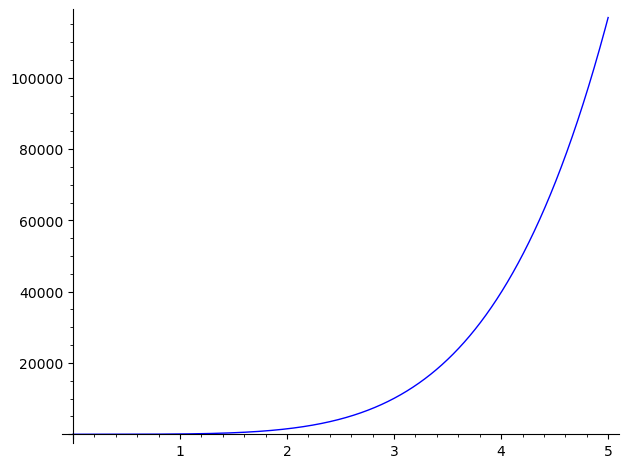

In [73]:
# Example usage:
var('x, y')
f(x,y) = 1 + y^2  # Define your differential equation y' = f(x,y)
x0 = 0          # Initial point
y0 = 1          # Initial value
n = 5           # Order of Taylor polynomial

# Get solution
solution = taylor_solution(f, n, x0, y0, x)
print(f"Taylor series solution up to order {n}: {solution}")
plot(lambda x: solution.subs(x=x), 0, 5)

In [93]:
# Example usage:
var('x, y')
f(x,y) = y/(1-x^2) + 1 + x  # Define your differential equation y' = f(x,y)
x0 = 0          # Initial point
y0 = 0          # Initial value
n = 5           # Order of Taylor polynomial

# Get solution
solution = taylotion(f, n, x0, y0, x)
print(f"Taylor series solution up to order {n}: {solution}")
plot(lambda x: solution.subs(x=x), 0, 5)

NameError: name 'taylotion' is not defined

Taylor series solution up to order 5: (x, y) |--> x + 1/2


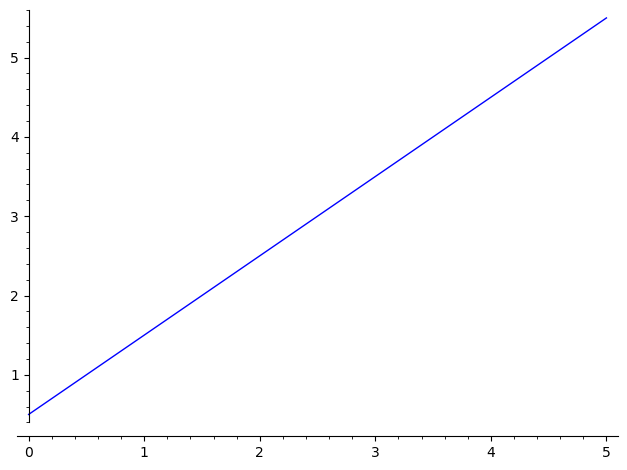

In [95]:
# Example usage:
var('x, y')
f(x,y) = 2*y - x^2  # Define your differential equation y' = f(x,y)
x0 = 0          # Initial point
y0 = 1/4          # Initial value
n = 5           # Order of Taylor polynomial

# Get solution
solution = taylor_solution(f, n, x0, y0, x)
print(f"Taylor series solution up to order {n}: {solution}")
plot(lambda x: solution.subs(x=x), 0, 5)

In [2]:
def euler_method(f, x0, y0, b, n):
    """
    Euler method for solving differential equations
    Input:
        f: function f(x,y) in the differential equation y' = f(x,y)
        x0: initial x value (a in [a,b])
        y0: initial y value
        b: end point of interval
        n: number of steps
    Output:
        Lists of x values and corresponding y approximations
    """
    # Calculate step size h = (b-a)/n
    h = (b - x0) / n
    
    # Initialize lists to store values
    x_values = [x0]
    y_values = [y0]
    
    # Implement Euler method
    for i in range(n):
        # Current values
        xk = x_values[-1]
        yk = y_values[-1]
        
        # Calculate next values using Euler formulas
        xk1 = xk + h
        yk1 = yk + h * f(xk, yk)
        
        # Store new values
        x_values.append(xk1)
        y_values.append(yk1)
    
    return x_values, y_values

x values: [0, 1/2, 1, 3/2, 2, 5/2, 3, 7/2, 4, 9/2, 5]
y values: [1, 2, 9/2, 121/8, 16641/128, 281199361/32768, 79091510381872641/2147483648, 6255467354181322847656016703851521/9223372036854775808, 39130871819228395017131277828296886284205345971688374985366705674241/170141183460469231731687303715884105728, 1531225129332882961039976847886690238903112497219424755608942186293427931564823065767614882697874809539986875362464390049837327833640961/57896044618658097711785492504343953926634992332820282019728792003956564819968, 2344650396700504151031492111875364020888452730911338155627647940022139085826046600032385639296666941023555644370242732475449203408903556646419342578660026192336130421401903376866489399471251033257028835266554037215941028730108737701512441148562885701620345156783939543041/6703903964971298549787012499102923063739682910296196688861780721860882015036773488400937149083451713845015929093243025426876941405973284973216824503042048]


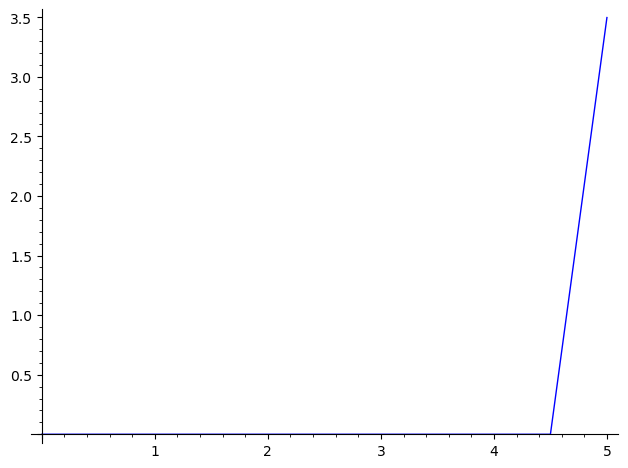

In [82]:
# Example usage:
var('x, y')
# Define your differential equation y' = f(x,y)
f(x,y) = 1 + y^2  # Example function

# Initial conditions and parameters
x0 = 0      # Starting point
y0 = 1      # Initial value
b = 5       # End point
n = 10      # Number of steps

# Get solution
x_vals, y_vals = euler_method(f, x0, y0, b, n)

# Print results
print("x values:", x_vals)
print("y values:", y_vals)

# Optional: Create a plot
points = list(zip(x_vals, y_vals))
plot_points = line(points)
show(plot_points)

x values: [0, 0.499900000000000, 0.999800000000000, 1.49970000000000, 1.99960000000000, 2.49950000000000, 2.99940000000000, 3.49930000000000, 3.99920000000000, 4.49910000000000, 4.99900000000000]
y values: [0, 0.499900000000000, 1.58285560702914, 1980.95418767391, 1189.40983440415, 992.608259040447, 899.797421824271, 845.545319888442, 810.205873615253, 785.691988225989, 768.028897598317]


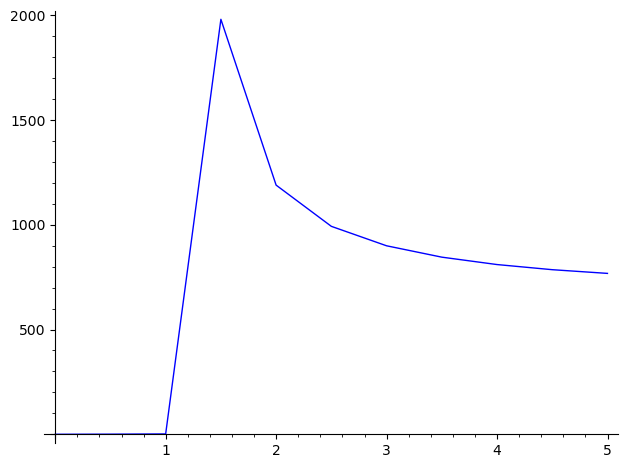

In [12]:
# Example usage:
var('x, y')
# Define your differential equation y' = f(x,y)
f(x,y) = y/(1-x^2)+1+x  # Example function

# Initial conditions and parameters
x0 = 0     # Starting point
y0 = 0      # Initial value
b = 4.999       # End point
n = 10      # Number of steps

# Get solution
x_vals, y_vals = euler_method(f, x0, y0, b, n)

# Print results
print("x values:", x_vals)
print("y values:", y_vals)

# Optional: Create a plot
points = list(zip(x_vals, y_vals))
plot_points = line(points)
show(plot_points)

x values: [0, 1/2, 1, 3/2, 2, 5/2, 3, 7/2, 4, 9/2, 5]
y values: [1/4, 1/2, 7/8, 5/4, 11/8, 3/4, -13/8, -31/4, -173/8, -205/4, -901/8]


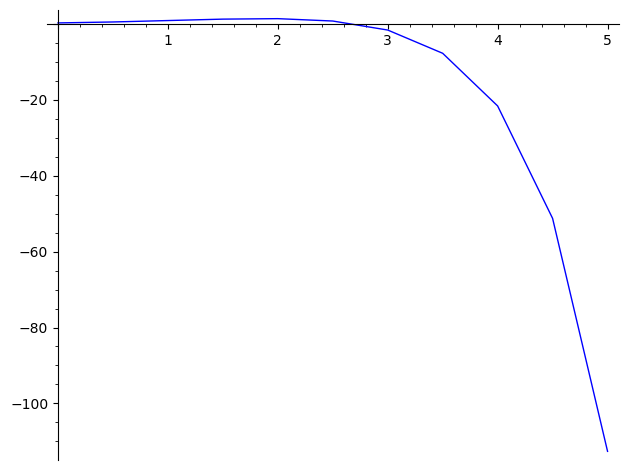

In [90]:
# Example usage:
var('x, y')
# Define your differential equation y' = f(x,y)
f(x,y) = 2*y -x^2  # Example function

# Initial conditions and parameters
x0 = 0      # Starting point
y0 = 1/4      # Initial value
b = 5       # End point
n = 10      # Number of steps

# Get solution
x_vals, y_vals = euler_method(f, x0, y0, b, n)

# Print results
print("x values:", x_vals)
print("y values:", y_vals)

# Optional: Create a plot
points = list(zip(x_vals, y_vals))
plot_points = line(points)
show(plot_points)

In [19]:
def rk4_method(f, x0, y0, b, n):
    """
    4th order Runge-Kutta method for solving differential equations
    Input:
        f: function f(x,y) in the differential equation y' = f(x,y)
        x0: initial x value
        y0: initial y value
        b: end point of interval
        n: number of steps
    Output:
        Lists of x values and corresponding y approximations
    """
    # Calculate step size h = (b-a)/n
    h = (b - x0) / n
    
    # Initialize lists to store values
    x_values = [x0]
    y_values = [y0]
    
    try:
        for i in range(n):
            xk = x_values[-1]
            yk = y_values[-1]
            
            # Calculate k1, k2, k3, k4
            k1 = f(xk, yk)
            k2 = f(xk + h/2, yk + h*k1/2)
            k3 = f(xk + h/2, yk + h*k2/2)
            k4 = f(xk + h, yk + h*k3)
            
            # Calculate next y value using RK4 formula
            yk1 = yk + h * (k1/6 + k2/3 + k3/3 + k4/6)
            xk1 = xk + h
            
            x_values.append(xk1)
            y_values.append(yk1)
            
    except ZeroDivisionError:
        print("Error: Division by zero encountered")
        return x_values, y_values
        
    return x_values, y_values


First few points (x, y):
(0.0000, 1.0000)
(0.2000, 1.5085)
(0.4000, 2.4640)
(0.6000, 5.2919)
(0.8000, 61.0087)


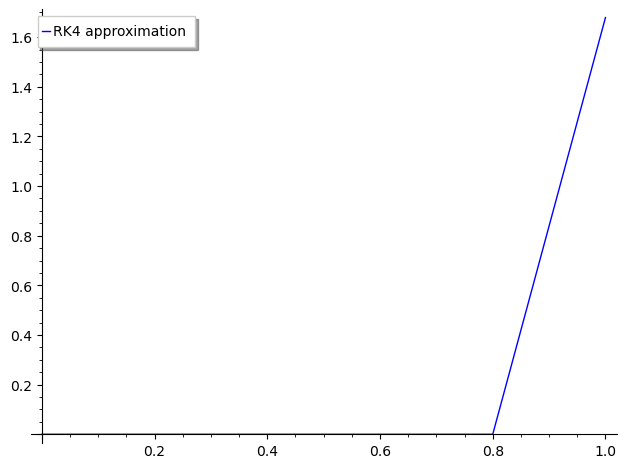

In [23]:
# Example usage with your function f(x,y) = y/(1-x^2) + 1 + x
def f(x, y):
    return 1 + y^2

# Set parameters
x0 = 0
y0 = 1
b = 1  # Stay away from singularity at x = 1
n = 5

# Get solution
x_vals, y_vals = rk4_method(f, x0, y0, b, n)

# Print first few points
print("\nFirst few points (x, y):")
for i in range(min(5, len(x_vals))):
    print(f"({float(x_vals[i]):.4f}, {float(y_vals[i]):.4f})")

# Create a plot
points = list(zip(x_vals, y_vals))
plot_points = line(points, color='blue', legend_label='RK4 approximation')
show(plot_points)


First few points (x, y):
(0.0000, 0.0000)
(0.0450, 0.0471)
(0.0900, 0.0984)
(0.1350, 0.1542)
(0.1800, 0.2148)


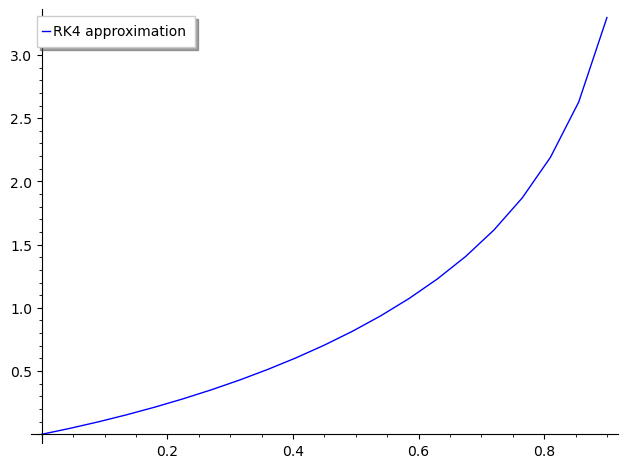

In [14]:
# Example usage with your function f(x,y) = y/(1-x^2) + 1 + x
def f(x, y):
    return y/(1 - x^2) + 1 + x

# Set parameters
x0 = 0
y0 = 0
b = 0.9  # Stay away from singularity at x = 1
n = 20

# Get solution
x_vals, y_vals = rk4_method(f, x0, y0, b, n)

# Print first few points
print("\nFirst few points (x, y):")
for i in range(min(5, len(x_vals))):
    print(f"({x_vals[i]:.4f}, {y_vals[i]:.4f})")

# Create a plot
points = list(zip(x_vals, y_vals))
plot_points = line(points, color='blue', legend_label='RK4 approximation')
show(plot_points)


First few points (x, y):
(0.0000, 0.2500)
(2.0000, 0.5833)
(4.0000, -83.9722)
(6.0000, -3216.3796)
(8.0000, -111125.0340)


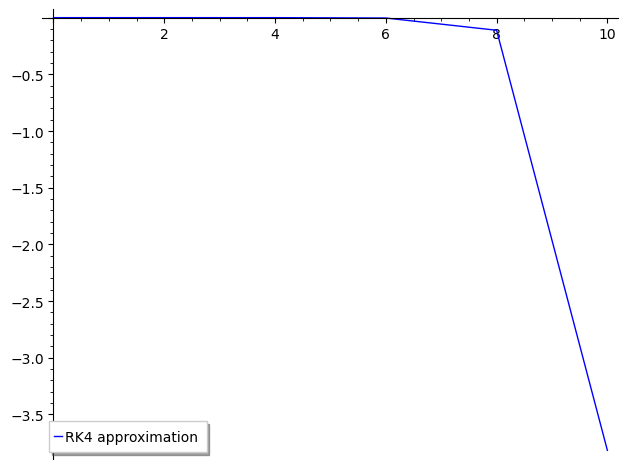

In [27]:
# Example usage with your function f(x,y) = y/(1-x^2) + 1 + x
def f(x, y):
    return 2*y - x^2

# Set parameters
x0 = 0
y0 = 1/4
b = 10  # Stay away from singularity at x = 1
n = 5

# Get solution
x_vals, y_vals = rk4_method(f, x0, y0, b, n)

# Print first few points
print("\nFirst few points (x, y):")
for i in range(min(5, len(x_vals))):
    print(f"({float(x_vals[i]):.4f}, {float(y_vals[i]):.4f})")

# Create a plot
points = list(zip(x_vals, y_vals))
plot_points = line(points, color='blue', legend_label='RK4 approximation')
show(plot_points)

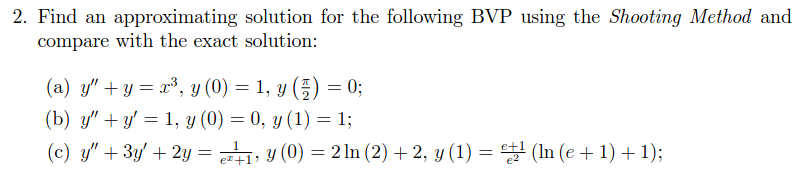

In [3]:
%display latex

In [1]:
x = var('x')
y = function('y')(x)

In [53]:
def shooting_method(d_eq, x0, y0, x1, y1):
    yy = desolve(
        d_eq, dvar=y, ivar=x, ics=[x0, y0, x1, y1], contrib_ode=True
    )
    p1 = plot(lambda x: yy.subs(x=x), x0, x1)
    
    # Empty plot to store all curves
    p2 = plot(0, x0, x1)
    
    # Create multiple solutions with different initial slopes (-1 to -20)
    for k in range(1, 21):
        # Solve ODE with initial conditions: y(0)=x0, y'(0)=-k
        yy_ = desolve(
            d_eq, dvar=y, ivar=x, ics=[x0, y0, -k]  # [t0, y0, y'0]
        )
        
        # Add each solution curve to the plot
        p2 += plot(lambda x: yy_.subs(x=x), x0, x1, color='red')

    a = x0
    b = x1
    alpha = var('alpha')
    
    y_alpha = desolve(
        d_eq, dvar=y, ivar=x, ics=[a, y0, alpha]
    )
    
    eq = y_alpha.subs(x=b) == 0
    alpha1 = solve(eq, alpha)[0].rhs()
    
    p3 = plot([
        lambda x: y_alpha.subs(x=x, alpha=alpha1), 
        lambda x: yy.subs(x=x)
    ], a, b, color=['red', 'blue'])

    return p1, p2, p3

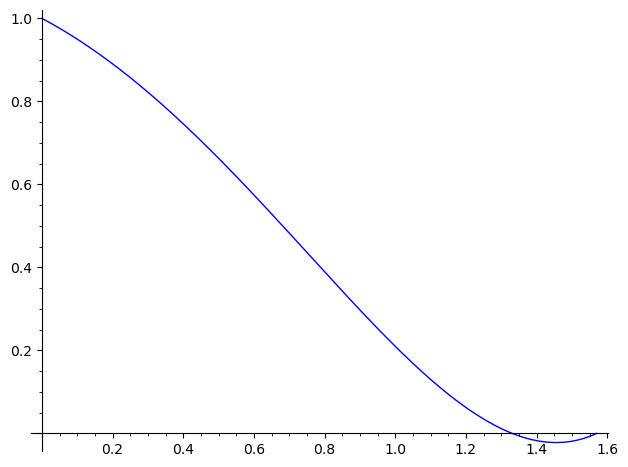

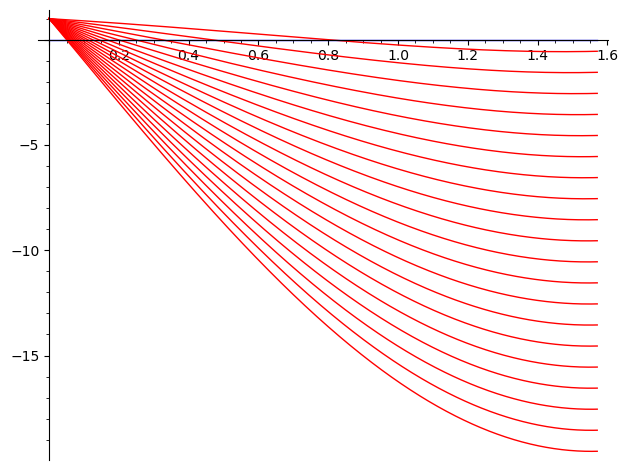

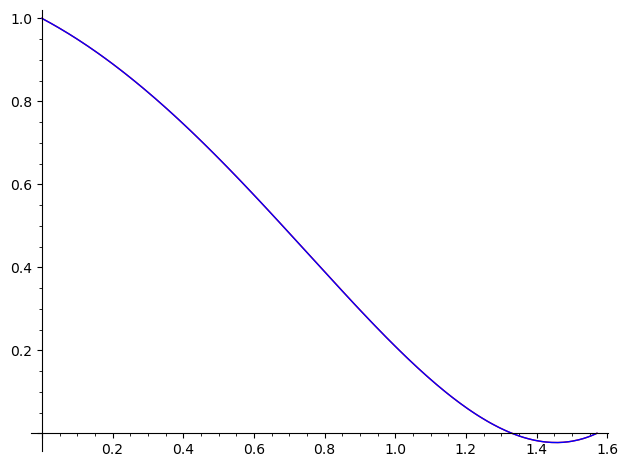

In [48]:
x0, y0, x1, y1 = 0, 1, pi/2, 0
d_eq = diff(y,x,2) + y == x^3
plots = shooting_method(d_eq, x0, y0, x1, y1)

plots[0].show()
plots[1].show()
plots[2].show()

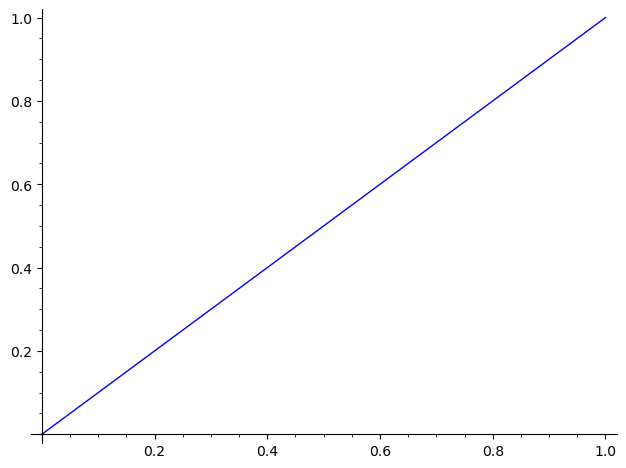

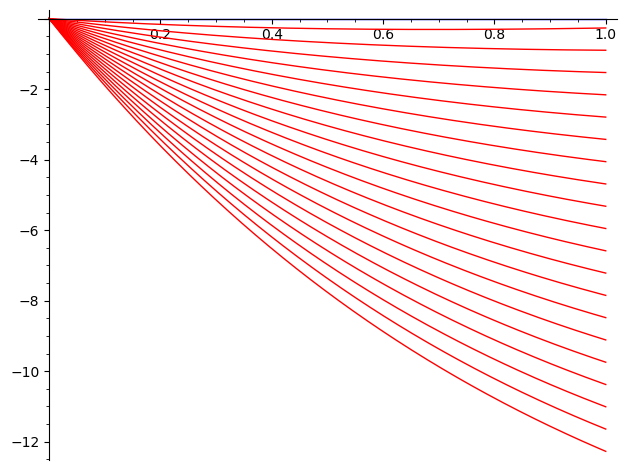

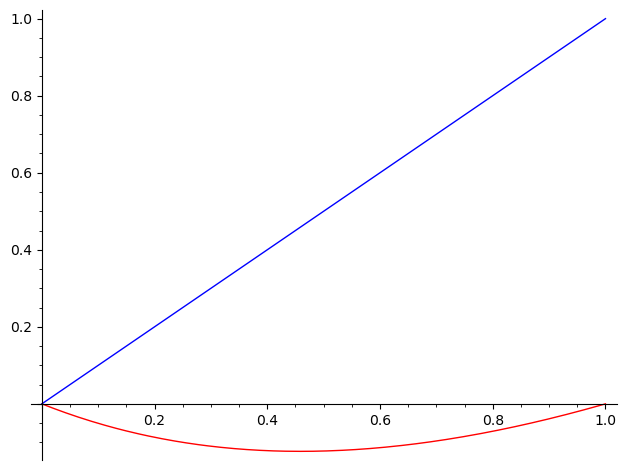

In [58]:
x0, y0, x1, y1 = 0, 0, 1, 1
d_eq = diff(y,x,2) + diff(y,x) == 1
# plots = shooting_method(d_eq, x0, y0, x1, y1)

plots[0].show()
plots[1].show()
plots[2].show()

In [55]:
x0, y0, x1, y1 = 0, 2*ln(2)+2, 1, ((e+1)/(e^2))*(ln(e+1) +1)
d_eq = diff(y,x,2) + 3*diff(y,x) + 2*y == 1/(e^x + 1)
plots = shooting_method(d_eq, x0, y0, x1, y1)

plots[0].show()
plots[1].show()
plots[2].show()

NotImplementedError: Unable to use initial condition for this equation (kovacic).

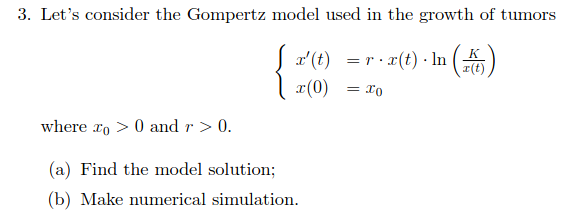

In [68]:
t, r, K, x0 = var('t r K x0')
x = function('x')(t)

d_eq = diff(x,t) == r*x*log(K/x)
de = desolve(d_eq, dvar=x, ivar=t, ics=[0, x0]).rhs()

def x_sol(t, r, x0, K):
    return de.subs(t=t, r=r, x0=x0, K=K)

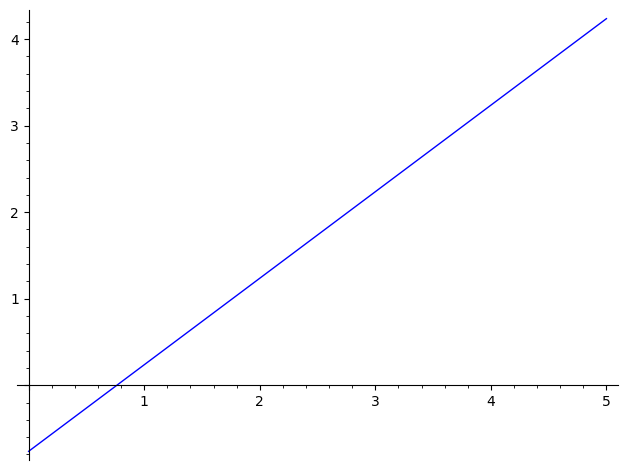

In [73]:
plot(lambda t: x_sol(t, 2, 2, 200), 0, 5)